In [1]:
import numpy as np
import pandas as pd 
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.utils import np_utils
%matplotlib inline 
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Importing the dataset
data = pd.read_csv('FeatureSelection.csv')

In [3]:
data.columns

Index(['Date', 'Indianoofconfirmedcases', 'Indianoofdeaths',
       'Indianoofrecovered', 'Nifty_50_Open', 'Nifty_50_High', 'Nifty_50_Low',
       'Nifty_50_Close', 'Nifty_IT_Open', 'Nifty_IT_High', 'Nifty_IT_Low',
       'Nifty_IT_Close', 'Nifty_Pharma_Open', 'Nifty_Pharma_High',
       'Nifty_Pharma_Low', 'Nifty_Pharma_Close', 'SBI_ETF_GOLD_OPEN',
       'SBI_ETF_GOLD_HIGH', 'SBI_ETF_GOLD_CLOSE', 'INDIA_VIX_CLOSE',
       'INR_Close', 'S&P_500_Close', 'CRUDE_Close', 'EURO_NEXT_100_Close',
       'EURO_STOXX_50_Close', 'Spain_IBEX_Close', 'Singapore_sti_close',
       'SK_Close', 'Italy_FMIB_CLOSE', 'Taiwan_TW_CLOSE', 'France_FCHI_CLOSE',
       'China_SS_Close', 'Chinanoofdeaths', 'Chinanoofrecovered',
       'Chinanoofconfirmedcases', 'SouthKoreanoofconfirmedcases',
       'SouthKoreanoofdeaths', 'SouthKoreanoofrecovered',
       'Francenoofconfirmedcases', 'Francenoofdeaths', 'Francenoofrecovered',
       'Germanynoofconfirmedcases', 'Germanynoofdeaths',
       'Germanynoofrecovere

In [4]:
data.head()

,Date,Indianoofconfirmedcases,Indianoofdeaths,Indianoofrecovered,Nifty_50_Open,Nifty_50_High,Nifty_50_Low,Nifty_50_Close,Nifty_IT_Open,Nifty_IT_High,...,Taiwannoofconfirmedcases,Taiwannoofdeaths,Taiwannoofrecovered,USnoofconfirmedcases,USnoofdeaths,USnoofrecovered,United Kingdomnoofconfirmedcases,United Kingdomnoofdeaths,United Kingdomnoofrecovered,Nifty_50_Direction
0,02/01/2020,1,0,0,11939.00,12017.35,11633.30,11661.85,16138.60,16319.75,...,10,0,0,8,0,0,2,0,0,1
1,02/03/2020,3,0,0,11627.45,11749.85,11614.50,11707.90,16282.00,16418.90,...,10,0,0,11,0,0,2,0,0,1
2,02/04/2020,3,0,0,11786.25,11986.15,11783.40,11979.65,16174.80,16377.45,...,11,0,0,11,0,0,2,0,0,1
3,02/05/2020,3,0,0,12005.85,12098.15,11953.35,12089.15,16354.45,16463.60,...,11,0,0,11,0,0,2,0,0,1
4,02/06/2020,3,0,0,12120.00,12160.60,12084.65,12137.95,16480.75,16621.35,...,16,0,1,11,0,0,2,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 63 columns):
Date                                74 non-null object
Indianoofconfirmedcases             74 non-null int64
Indianoofdeaths                     74 non-null int64
Indianoofrecovered                  74 non-null int64
Nifty_50_Open                       74 non-null float64
Nifty_50_High                       74 non-null float64
Nifty_50_Low                        74 non-null float64
Nifty_50_Close                      74 non-null float64
Nifty_IT_Open                       74 non-null float64
Nifty_IT_High                       74 non-null float64
Nifty_IT_Low                        74 non-null float64
Nifty_IT_Close                      74 non-null float64
Nifty_Pharma_Open                   74 non-null float64
Nifty_Pharma_High                   74 non-null float64
Nifty_Pharma_Low                    74 non-null float64
Nifty_Pharma_Close                  74 non-null float64
SBI_ETF_

In [6]:
data.set_index(data.iloc[:,0],inplace = True)
data.index.name = 'Date'
data= data.drop(data.columns[0] ,  axis='columns')

In [7]:
X=data.drop(data.columns[-1] ,  axis=1)

In [8]:
#Percentage Change
pct_data = np.round(X.pct_change()*100,2)

In [9]:
pct_data['Nifty_50_Direction'] = data['Nifty_50_Direction']

In [10]:
pct_data.head()

,Indianoofconfirmedcases,Indianoofdeaths,Indianoofrecovered,Nifty_50_Open,Nifty_50_High,Nifty_50_Low,Nifty_50_Close,Nifty_IT_Open,Nifty_IT_High,Nifty_IT_Low,...,Taiwannoofconfirmedcases,Taiwannoofdeaths,Taiwannoofrecovered,USnoofconfirmedcases,USnoofdeaths,USnoofrecovered,United Kingdomnoofconfirmedcases,United Kingdomnoofdeaths,United Kingdomnoofrecovered,Nifty_50_Direction
Date,,,,,,,,,,,,,,,,,,,,,
02/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
02/03/2020,200.0,NaN,NaN,-2.61,-2.23,-0.16,0.39,0.89,0.61,0.41,...,0.00,NaN,NaN,37.5,NaN,NaN,0.0,NaN,NaN,1
02/04/2020,0.0,NaN,NaN,1.37,2.01,1.45,2.32,-0.66,-0.25,0.76,...,10.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1
02/05/2020,0.0,NaN,NaN,1.86,0.93,1.44,0.91,1.11,0.53,0.79,...,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1
02/06/2020,0.0,NaN,NaN,0.95,0.52,1.10,0.40,0.77,0.96,0.29,...,45.45,NaN,inf,0.0,NaN,NaN,0.0,NaN,NaN,0


In [11]:
pct_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [12]:
pct_data.fillna(value=0,inplace=True)

In [13]:
pct_data.corr().head(60)

,Indianoofconfirmedcases,Indianoofdeaths,Indianoofrecovered,Nifty_50_Open,Nifty_50_High,Nifty_50_Low,Nifty_50_Close,Nifty_IT_Open,Nifty_IT_High,Nifty_IT_Low,...,Taiwannoofconfirmedcases,Taiwannoofdeaths,Taiwannoofrecovered,USnoofconfirmedcases,USnoofdeaths,USnoofrecovered,United Kingdomnoofconfirmedcases,United Kingdomnoofdeaths,United Kingdomnoofrecovered,Nifty_50_Direction
Indianoofconfirmedcases,1.000000,0.159517,0.078955,-0.012882,-0.074614,-0.045436,-0.077731,0.024252,-0.033179,0.042534,...,0.055461,0.038267,0.015424,0.308198,0.410071,0.029330,0.288724,0.099335,-0.037461,0.040239
Indianoofdeaths,0.159517,1.000000,0.483030,-0.177872,-0.006676,-0.188593,-0.005587,-0.244581,-0.166869,-0.192322,...,0.210201,0.240441,0.033769,0.213240,0.559704,0.234941,0.227442,0.086742,-0.014992,-0.040525
Indianoofrecovered,0.078955,0.483030,1.000000,-0.032724,0.028422,0.001453,0.025016,-0.129704,-0.019322,-0.008823,...,0.116004,0.124732,0.062668,0.095694,0.328927,0.105804,0.060482,0.054044,0.140929,-0.143695
Nifty_50_Open,-0.012882,-0.177872,-0.032724,1.000000,0.646811,0.825486,0.342446,0.821597,0.568950,0.762459,...,-0.030073,-0.118526,-0.095930,-0.181805,-0.138441,-0.148486,-0.085397,0.099866,-0.045057,-0.228193
Nifty_50_High,-0.074614,-0.006676,0.028422,0.646811,1.000000,0.664496,0.827460,0.532204,0.817840,0.545308,...,-0.272873,-0.080494,-0.096714,-0.307119,-0.362378,-0.209590,-0.172729,-0.325071,-0.052575,-0.142968
Nifty_50_Low,-0.045436,-0.188593,0.001453,0.825486,0.664496,1.000000,0.582914,0.751996,0.634345,0.886650,...,-0.058111,0.007836,-0.147647,-0.196285,-0.134959,-0.173957,-0.146571,0.159180,-0.053045,-0.161307
Nifty_50_Close,-0.077731,-0.005587,0.025016,0.342446,0.827460,0.582914,1.000000,0.322824,0.762406,0.446902,...,-0.322052,-0.003787,-0.137881,-0.317110,-0.361450,-0.204818,-0.211233,-0.341222,-0.029542,-0.104594
Nifty_IT_Open,0.024252,-0.244581,-0.129704,0.821597,0.532204,0.751996,0.322824,1.000000,0.588375,0.849626,...,-0.035030,-0.122000,-0.188747,-0.246138,-0.138348,-0.162605,-0.187016,0.023297,-0.040593,-0.083043
Nifty_IT_High,-0.033179,-0.166869,-0.019322,0.568950,0.817840,0.634345,0.762406,0.588375,1.000000,0.634513,...,-0.209274,0.184266,-0.099026,-0.318203,-0.332765,-0.046424,-0.193149,-0.322637,-0.026511,-0.095366
Nifty_IT_Low,0.042534,-0.192322,-0.008823,0.762459,0.545308,0.886650,0.446902,0.849626,0.634513,1.000000,...,0.045543,0.020155,-0.106531,-0.108953,-0.049492,-0.075746,-0.126028,0.137680,-0.038855,-0.032624


In [14]:
pct_data.corr().describe()

,Indianoofconfirmedcases,Indianoofdeaths,Indianoofrecovered,Nifty_50_Open,Nifty_50_High,Nifty_50_Low,Nifty_50_Close,Nifty_IT_Open,Nifty_IT_High,Nifty_IT_Low,...,Taiwannoofconfirmedcases,Taiwannoofdeaths,Taiwannoofrecovered,USnoofconfirmedcases,USnoofdeaths,USnoofrecovered,United Kingdomnoofconfirmedcases,United Kingdomnoofdeaths,United Kingdomnoofrecovered,Nifty_50_Direction
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.095627,0.111664,0.074941,0.051294,0.068038,0.078081,0.076622,0.041867,0.081267,0.103966,...,0.136361,0.078081,0.075374,0.137608,0.134626,0.035906,0.151498,0.059098,0.043343,0.018689
std,0.157981,0.239544,0.177078,0.297430,0.375983,0.335959,0.401589,0.307146,0.388859,0.316171,...,0.241925,0.177119,0.234271,0.340172,0.329640,0.197844,0.287018,0.306617,0.168128,0.180271
min,-0.077731,-0.244581,-0.207894,-0.586710,-0.487158,-0.603275,-0.532328,-0.480934,-0.465749,-0.574420,...,-0.322052,-0.131266,-0.231800,-0.346897,-0.362378,-0.209590,-0.266108,-0.422174,-0.103369,-0.228193
25%,0.004722,-0.055229,-0.025288,-0.120187,-0.220008,-0.134951,-0.197530,-0.153327,-0.264033,-0.088500,...,-0.050272,-0.022663,-0.088072,-0.162791,-0.137500,-0.082296,-0.134697,-0.189550,-0.032710,-0.099730
50%,0.060903,0.076363,0.060745,-0.024606,-0.056167,-0.043560,-0.062377,-0.030141,-0.027992,0.006722,...,0.138576,0.030000,0.019201,0.087586,0.052027,-0.005570,0.149243,0.045915,-0.004199,-0.012487
75%,0.160160,0.237895,0.115604,0.089500,0.403214,0.227154,0.420788,0.117857,0.399954,0.241503,...,0.296607,0.135580,0.127375,0.315882,0.433697,0.091452,0.321307,0.221097,0.051107,0.098443
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#Check for multi collinearity and remove the feature
def calculate_vif_(X, thresh=50):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [16]:
calculate_vif_(pct_data)

dropping 'Nifty_Pharma_Open' at index: 11
dropping 'Nifty_Pharma_Low' at index: 12
dropping 'Nifty_Pharma_High' at index: 11
dropping 'Italynoofconfirmedcases' at index: 40
dropping 'USnoofconfirmedcases' at index: 51
dropping 'EURO_NEXT_100_Close' at index: 19
dropping 'Francenoofrecovered' at index: 35
dropping 'EURO_STOXX_50_Close' at index: 19
dropping 'USnoofdeaths' at index: 48
dropping 'Nifty_IT_Close' at index: 10
dropping 'Francenoofconfirmedcases' at index: 31
dropping 'Italynoofdeaths' at index: 35
dropping 'United Kingdomnoofdeaths' at index: 47
Remaining variables:
Index(['Indianoofconfirmedcases', 'Indianoofdeaths', 'Indianoofrecovered',
       'Nifty_50_Open', 'Nifty_50_High', 'Nifty_50_Low', 'Nifty_50_Close',
       'Nifty_IT_Open', 'Nifty_IT_High', 'Nifty_IT_Low', 'Nifty_Pharma_Close',
       'SBI_ETF_GOLD_OPEN', 'SBI_ETF_GOLD_HIGH', 'SBI_ETF_GOLD_CLOSE',
       'INDIA_VIX_CLOSE', 'INR_Close', 'S&P_500_Close', 'CRUDE_Close',
       'Spain_IBEX_Close', 'Singapore_sti_cl

,Indianoofconfirmedcases,Indianoofdeaths,Indianoofrecovered,Nifty_50_Open,Nifty_50_High,Nifty_50_Low,Nifty_50_Close,Nifty_IT_Open,Nifty_IT_High,Nifty_IT_Low,...,Spainnoofconfirmedcases,Spainnoofdeaths,Spainnoofrecovered,Taiwannoofconfirmedcases,Taiwannoofdeaths,Taiwannoofrecovered,USnoofrecovered,United Kingdomnoofconfirmedcases,United Kingdomnoofrecovered,Nifty_50_Direction
Date,,,,,,,,,,,,,,,,,,,,,
02/01/2020,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1
02/03/2020,200.00,0.00,0.00,-2.61,-2.23,-0.16,0.39,0.89,0.61,0.41,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1
02/04/2020,0.00,0.00,0.00,1.37,2.01,1.45,2.32,-0.66,-0.25,0.76,...,0.00,0.00,0.00,10.00,0.0,0.00,0.00,0.00,0.00,1
02/05/2020,0.00,0.00,0.00,1.86,0.93,1.44,0.91,1.11,0.53,0.79,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1
02/06/2020,0.00,0.00,0.00,0.95,0.52,1.10,0.40,0.77,0.96,0.29,...,0.00,0.00,0.00,45.45,0.0,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/18/2020,16.95,14.64,29.66,-0.26,-0.26,-2.69,-3.43,-0.73,0.25,0.01,...,0.62,0.91,3.86,0.00,0.0,2.84,12.93,4.08,4.11,1
5/19/2020,6.13,4.63,7.84,-2.15,-1.40,0.55,0.63,-0.04,0.86,0.67,...,0.19,0.25,0.00,0.00,0.0,0.00,2.19,0.98,0.83,1
5/20/2020,5.22,4.00,7.36,-0.81,0.70,0.23,2.11,1.29,0.24,1.25,...,0.22,0.40,0.00,0.00,0.0,0.00,1.70,-0.21,1.55,0


In [17]:
Fifty_X_Features=['Indianoofconfirmedcases', 'Indianoofdeaths', 'Indianoofrecovered',
       'Nifty_50_Open', 'Nifty_50_High', 'Nifty_50_Low', 'Nifty_50_Close',
       'Nifty_IT_Open', 'Nifty_IT_High', 'Nifty_IT_Low', 'Nifty_Pharma_Close',
       'SBI_ETF_GOLD_OPEN', 'SBI_ETF_GOLD_HIGH', 'SBI_ETF_GOLD_CLOSE',
       'INDIA_VIX_CLOSE', 'INR_Close', 'S&P_500_Close', 'CRUDE_Close',
       'Spain_IBEX_Close', 'Singapore_sti_close', 'SK_Close',
       'Italy_FMIB_CLOSE', 'Taiwan_TW_CLOSE', 'France_FCHI_CLOSE',
       'China_SS_Close', 'Chinanoofdeaths', 'Chinanoofrecovered',
       'Chinanoofconfirmedcases', 'SouthKoreanoofconfirmedcases',
       'SouthKoreanoofdeaths', 'SouthKoreanoofrecovered', 'Francenoofdeaths',
       'Germanynoofconfirmedcases', 'Germanynoofdeaths',
       'Germanynoofrecovered', 'Italynoofrecovered', 'Japannoofconfirmedcases',
       'Japannoofdeaths', 'Japannoofrecovered', 'Spainnoofconfirmedcases',
       'Spainnoofdeaths', 'Spainnoofrecovered', 'Taiwannoofconfirmedcases',
       'Taiwannoofdeaths', 'Taiwannoofrecovered', 'USnoofrecovered',
       'United Kingdomnoofconfirmedcases', 'United Kingdomnoofrecovered']
Fifty_y_Features=['Nifty_50_Direction']
Classification=['-1','0','1']

In [18]:
def scale(X_train, X_test):
  scaler = MinMaxScaler(feature_range=(0, 1))
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  return scaler,X_train,X_test

In [19]:
def lstm(X_train,y_train,X_test,y_test,stackedLSTMcheckpoint_path):
  #Make it 3 Dimensional Data - needed for LSTM
  #print("X_train shape:",X_train.shape)
  #print("X_test shape:",X_test.shape)
  X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
  X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
  y_train = np_utils.to_categorical(y_train, num_classes=3)
  y_test = np_utils.to_categorical(y_test, num_classes=3)
  num_classes = 3
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.LSTM(512, return_sequences=True, input_shape=(1, X_test.shape[2])))
  model.add(tf.keras.layers.LSTM(512))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(10))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(5))
  model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
  cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=stackedLSTMcheckpoint_path,
                                                 save_weights_only=True,
                                                 monitor='loss',
                                                 mode = 'min',
                                                 save_best_only=True,
                                                 verbose=1)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test), batch_size=32, callbacks=[cp_callback])  
  testPredict = model.predict(X_test)
  #return testPredict #[0][0]
  #return (np.argmax(testPredict[0]),testPredict[0][np.argmax(testPredict[0])])
  return (Classification[np.argmax(testPredict[0])])  

In [20]:
def Direction_data(train_size,X_feature,y_feature,stackedLSTMcheckpoint_path):
  train, test = pct_data.iloc[0:train_size - 1, :], pct_data.iloc[[train_size], :]
  y_train = train[y_feature]
  X_train = train[X_feature]
  y_test = test[y_feature]
  X_test = test[X_feature]
  #Normalize data
  scaler, X_train, X_test = scale(X_train, X_test)
  predicted = lstm(X_train,y_train,X_test,y_test,stackedLSTMcheckpoint_path)
  return predicted

In [21]:
def model_Prediction(nifty,predictedData): 
   if (nifty == "50"): 
       final_data=pct_data.iloc[59:,[-1]]
       feature="Predicted_Nifty_50_Direction"
   elif (nifty == "IT"): 
       final_data=pct_data.iloc[30:,[-2]]
       feature="Predicted_Nifty_IT_Direction" 
   else:
       final_data=pct_data.iloc[30:,[-1]]
       feature="Predicted_Nifty_Pharma_Direction"
   final_data[feature]=predictedData
   final_data[feature]=final_data[feature].astype('int64')
   return final_data   

In [22]:
def showPlot(nifty,predictedData):    
   print("Model Prediction:")
   plt.figure(figsize=(16,8))
   plt.title('Nifty %s Stock Direction' % nifty)
   plt.xlabel('Date', fontsize=18)
   plt.xticks(rotation='vertical')
   plt.ylabel('Direction', fontsize=18)
   if (nifty == "50"): 
       feature1="Nifty_50_Direction"
       feature2="Predicted_Nifty_50_Direction"
   elif (nifty == "IT"): 
       feature1="Nifty_IT_Direction"
       feature2="Predicted_Nifty_IT_Direction" 
   else:
       feature1="Nifty_Pharma_Direction"
       feature2="Predicted_Nifty_Pharma_Direction"
   plt.plot(predictedData[feature1])
   plt.plot(predictedData[feature2])
   plt.legend(['Actual','Predictions'], loc='upper right')
   plt.show()

In [23]:
Nifty_50_predict = []
for i in range(59,len(pct_data)):
  Nifty_50_predict.append(Direction_data(i,Fifty_X_Features,Fifty_y_Features,"FiftycovidstockstackedLstm.ckpt"))

Train on 58 samples, validate on 1 samples
Epoch 1/2
32/58 [===============>..............] - ETA: 4s - loss: 1.1002 - accuracy: 0.2500
Epoch 00001: loss improved from inf to 1.09796, saving model to FiftycovidstockstackedLstm.ckpt
58/58 [==============================] - 8s 144ms/sample - loss: 1.0980 - accuracy: 0.3276 - val_loss: 1.1810 - val_accuracy: 0.0000e+00
Epoch 2/2
32/58 [===============>..............] - ETA: 0s - loss: 1.0689 - accuracy: 0.4688
Epoch 00002: loss improved from 1.09796 to 1.08990, saving model to FiftycovidstockstackedLstm.ckpt
58/58 [==============================] - 2s 27ms/sample - loss: 1.0899 - accuracy: 0.4138 - val_loss: 1.2322 - val_accuracy: 0.0000e+00
Train on 59 samples, validate on 1 samples
Epoch 1/2
32/59 [===============>..............] - ETA: 4s - loss: 1.0987 - accuracy: 0.2812
Epoch 00001: loss improved from inf to 1.09825, saving model to FiftycovidstockstackedLstm.ckpt
59/59 [==============================] - 8s 135ms/sample - loss: 1.098

In [24]:
Nifty_50_predict

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-1', '0', '0']

In [25]:
Nifty_50_Direction_df = model_Prediction("50",Nifty_50_predict)

In [26]:
Nifty_50_Direction_df

,Nifty_50_Direction,Predicted_Nifty_50_Direction
Date,,
05/04/2020,0,0
05/05/2020,1,0
05/06/2020,0,0
05/07/2020,1,0
05/08/2020,0,0
05/11/2020,0,0
05/12/2020,1,0
5/13/2020,-1,0
5/14/2020,0,0


Model Prediction:


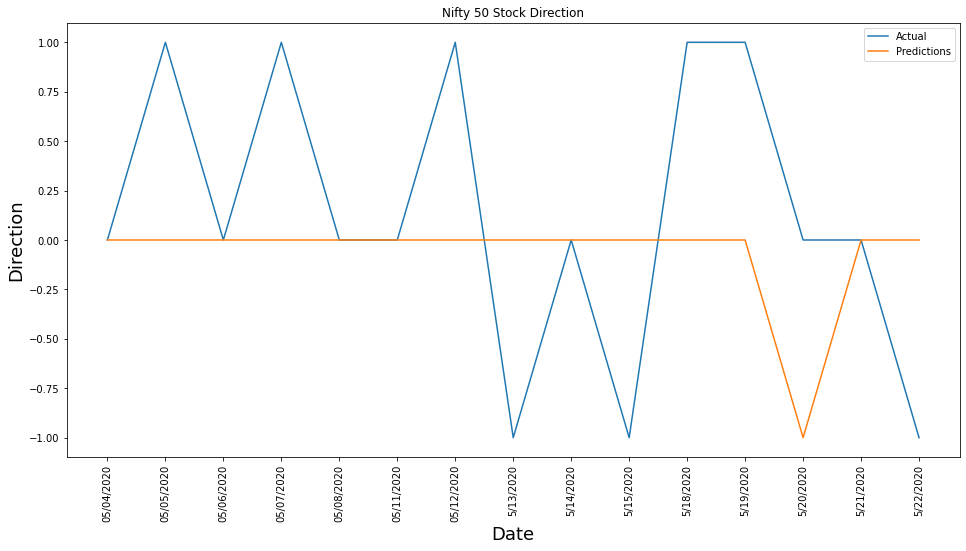

In [27]:
showPlot("50",Nifty_50_Direction_df)